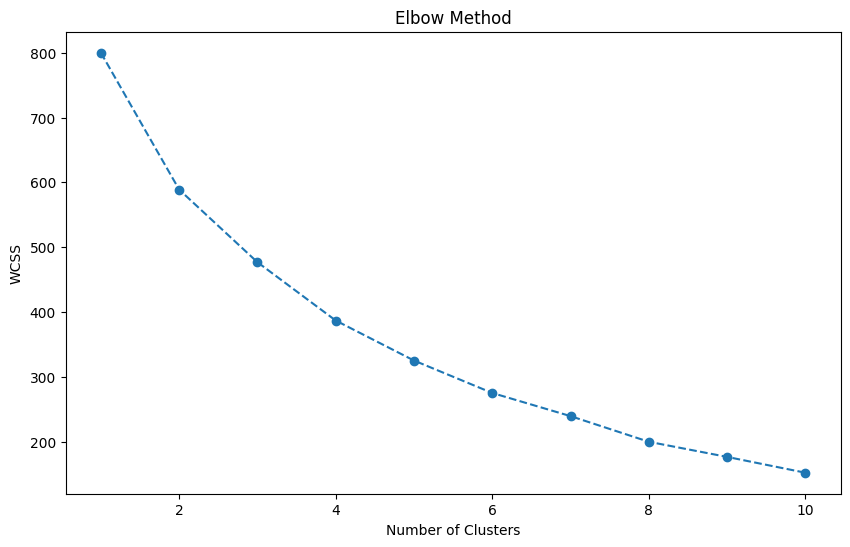

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster  
0        1  
1        1  
2        4  
3        2  
4        4  


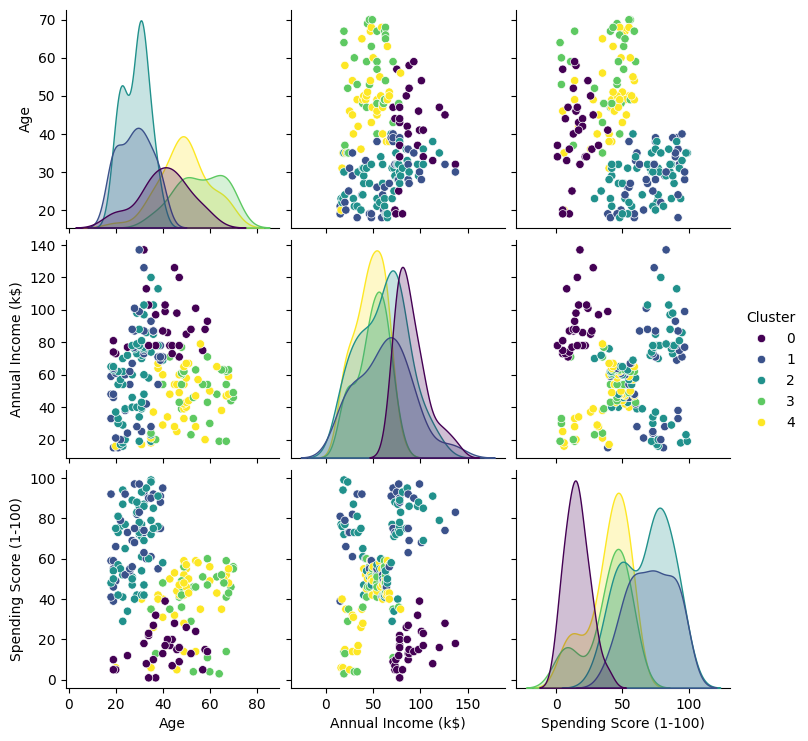

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv("customers.csv")

# Transforming the gender column to integers (0 and 1).
label_encoder = LabelEncoder()
data["Gender"] = label_encoder.fit_transform(data["Gender"])

features = data.drop(["CustomerID"] , axis = 1)

# Normalizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Converting back to a DataFrame
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

wcss = []  # Withing-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method, which is used to find the best value of K (no. of clusters).
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Applying KMeans to the dataset
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(features_scaled)

# Adding the cluster labels to the original data (adding a new column)
data["Cluster"] = clusters

print(data.head())

sns.pairplot(data[["Age", "Annual Income (k$)", "Spending Score (1-100)", "Cluster"]], hue="Cluster", palette="viridis")
plt.show()
